# Rodrigo_Mesquita_DR4_AT
## Engenharia de Prompts para Ciência de Dados [24E4_4]
### Notebook disponível em: https://github.com/rodrigo1992-cmyk/DR4_AT
### Aplicação Streamlit disponível em: 

# Especificação da Solução

Vamos desenvolver uma solução que utilize IA para processar informações da Câmara dos Deputados do Brasil, tanto textuais, quanto imagens. A solução possui uma parte offline e online, descritas abaixo:

- **Offline (dataprep.py)**: coleta das informações com as APIs públicas da câmara e execução de atividades com prompts para sumarização, análises e marcação com palavras-chave. Criação de bases vetoriais para referência posterior.
- **Online (dashboard.py)**: visualização das informações coletadas, suas respectivas análises e interfaces com o usuário através de LLMs. 
- **URL base**: 'https://dadosabertos.camara.leg.br/api/v2/'
- **Data referência**: início em 01/08/2024 e fim em 30/08/2024 (datas inclusivas).
- **Plug-and-play**: a solução deve esperar um arquivo .env com a chave Gemini do usuário (o aluno desenvolve com a sua, mas não a exporta para o git!).
- **Faça o upload de todos os arquivos finais** (parquet, json, yaml e png).

## Exercício 1 Arquitetura da Solução

Desenhe a arquitetura da solução com o programa da sua escolha. 

A arquitetura deve indicar os pontos de processamento de informação, LLMs utilizados, bases de dados (parquets, jsons e faiss), arquivos de configuração (yaml), abas do dashboard e suas funcionalidades.
   
   - a. Exporte a arquitetura para o arquivo pdf importado no sistema.

   - b. Descreva a arquitetura, explicando seus pontos importantes.
   - c. Descreva o funcionamento de LLMs e como isso pode ser utilizado para atividades de sumarização.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta
A arquitetura (print abaixo) também está disponível no arquivo "arquitetura.pdf" dentro da pasta docs.

**Descrição da arquitetura**:
- Ao lado esquerdo, a arquitetura foca em mostrar as funções contidas no arquivo dataprep.py, as APIs consultadas, os outputs gerados e as requisições realizadas ao Gemini.
- No lado direito, são exibidas as páginas do arquivo dashboardV3.py, as fontes de dados importadas e as requisições realizadas aos Gemini.
- Importante observar que alguns trechos de código que estão contidos no notebook, não são citados na arquitetura, pois não fazem parte da "aplicação". Como por exemplo, o script que cria o arquivo "insights_distribuicao_deputados.json" e o script que cria o arquivo "insights_despesas_deputados.json".

**Descrição do Funcionamento de LLMs**:
São modelos de aprendizado profundo treinados com enorme volume de dados para processar e gerar texto em linguagem natural.
Durante a fase de treino eles aprendem os padrões e relações semânticas de uma língua a partir de grandes quantidades de textos, comumente extraídos da internet. 
A partir dos padrões aprendidos durante a fase de treinamento, o modelo se torna capaz de processar os inputs textuais fornecidos por usuários e os complementar de forma que faça sentido, simulando o raciocínio humano.
 
Em cases de summarização há duas abordagens principais executadas pelos modelos de LLM, a sumarização extrativa, na qual o modelo identifica as partes mais importantes do texto (frases ou parágrafos) e as extrai para formar o resumo, e a sumarização abstrativa, onde o modelo condensa as ideias principais e as reescreve com suas próprias palavras.

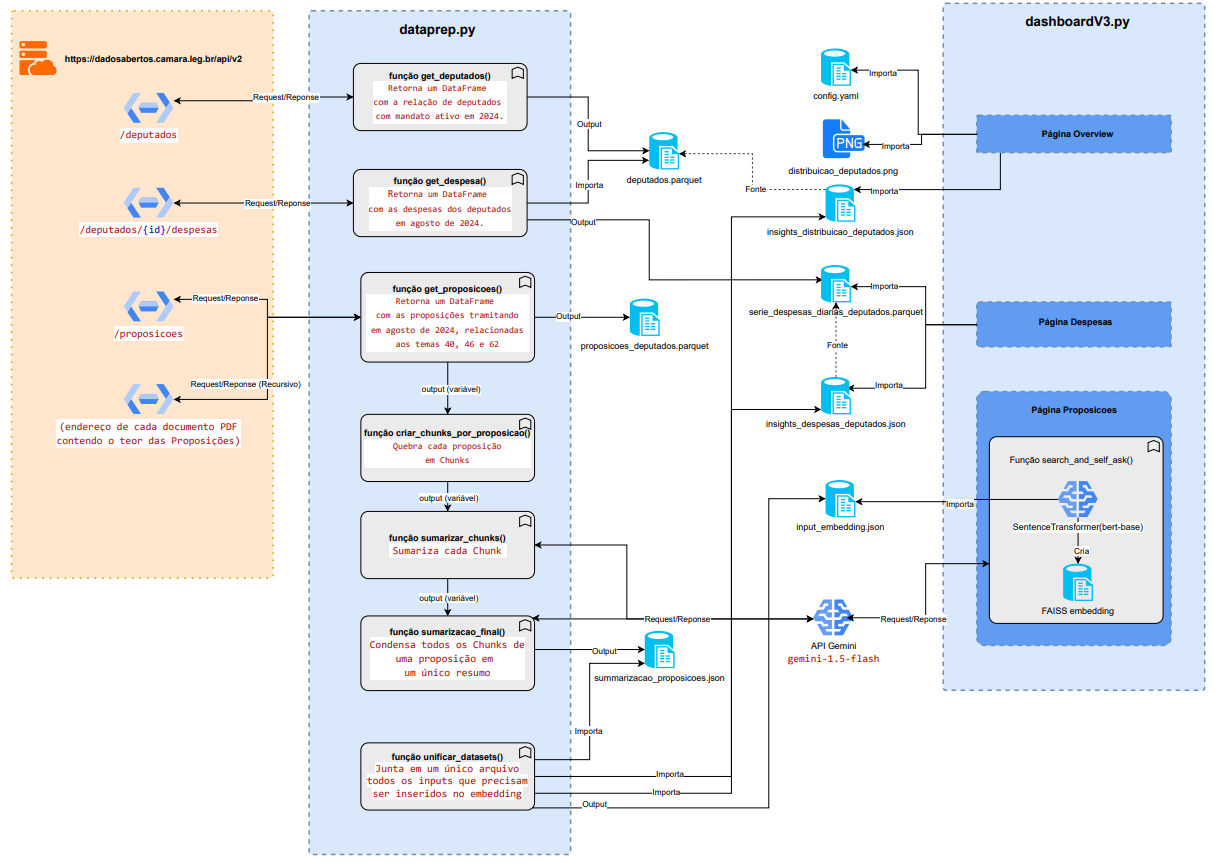

## Exercício 2 Criação de Textos com LLMs

Utilize a sua conta no “poe.com” para gerar um texto curto (2 parágrafos) que explique a Câmara dos Deputados. <br>
Execute o mesmo prompt com 3 LLMs diferentes (claude, gemini e chatgpt) e:
   - a. Explique as vantagens e desvantagens dos três LLMs escolhidos.
   - b. Argumente sobre a diferença entre a resposta dos 3 LLMs.
   - c. Justifique a escolha da resposta final.
   - d. Atualize o prompt do LLM final para gerar um arquivo data/config.yaml com a resposta final (chave: overview_summary).

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta

- Vantagens e Desvantagens dos 3 LLMs
    - O Gemini 1.5 Pro suporta um número muito maior de tokens no prompt de entrada, cerca de 1M, enquanto os demais aceitam cerca de 200 mil. 
    - Para Output, o Gemini 1.5Pro também tem uma capacidade superior, gerando até 8 mil, enquanto o Claude 4 mil e o GPT-4o 2 mil.
    - Dependendo da infraestrutura utilizada pela empresa, pode ser mais vantajoso utilizar o Gemini que é integrado por natureza a toda estrutura do Google Cloud Plataform, ou o GPT, que é abarcado na Azure. 
    - O custo do GPT-4o chega a ser 4x superior ao custo do Gemini 1.5 Pro.
    - No Benchmark entre modelos pode se observar que as notas dos 3 LLMs são muito próximas, com o ranking se intercambiando entre nas diferentes vertentes de avaliação.

fontes: 
- https://context.ai/compare/
- https://artificialanalysis.ai/models?models_selected=gpt-4o-2024-08-06%2Cgemini-1-5-pro%2Cclaude-35-sonnet

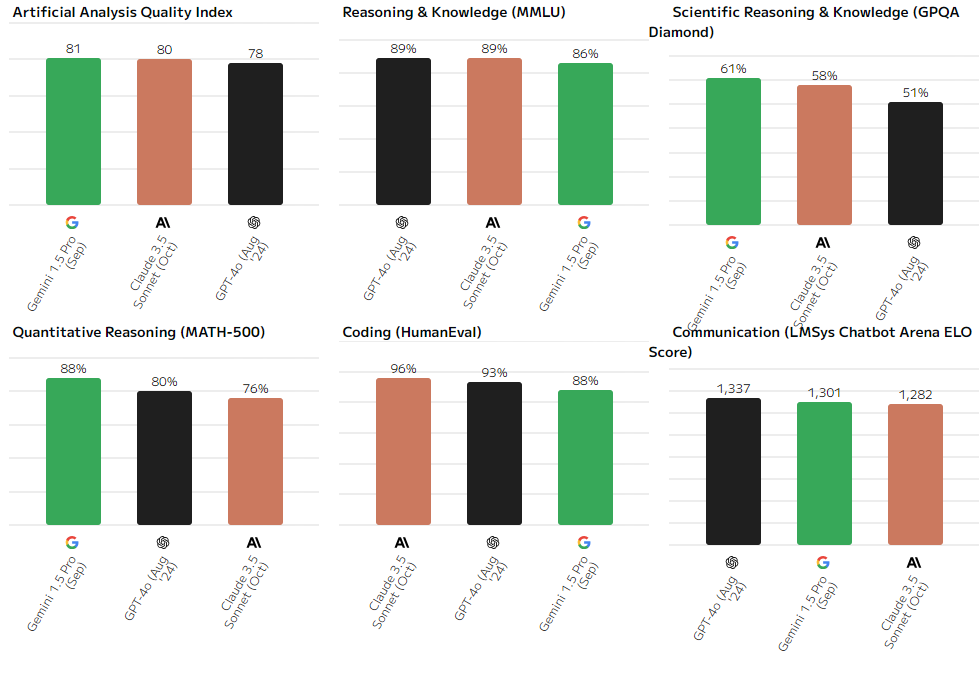

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

- Diferença entre a resposta dos 3 LLMs.
    - Os 3 modelos utilizaram basicamente as mesmas informações para contextualizar a Câmara dos Deputados, citando que é composta por 513 deputados, que são eleitos por votos da população e que fiscalizam o poder executivo e criam leis.
    - Apenas o Claude e o Sonnet informaram que a quantidade de deputados para cada estado é proporcional ao tamanho da população.
    - O Claude e o GPT-4o detalharam melhor o funcionamento da Câmara no segundo parágrafo.
    - O Gemini formulou o segundo parágrafo com percepções, usando sentenças como "debates acalorados", "reflexo da diversidade do povo", "busca por soluções para os desafios do país" e "fundamental para a democracia.
    - O GPT-4o explicou sobre a função das comissões permanentes para discutir projetos de leis antes de irem para votação no plenário, e que servem para escutar opniões de especialistas e da sociedade civil.
    - O Claude explicou sobre o sistema de freios e contrapesos, que possibilita instaurar CPIs para sabatinar autoridades, e até mesmo abrir processos administrativos contra o presidente da república.

- Justificativa da escolha da resposta final.
    - Selecionada a resposta do Claude, pois abrangiu mais detalhes em um texto de tamanho similar aos demais modelos.

### Prints dos resultados

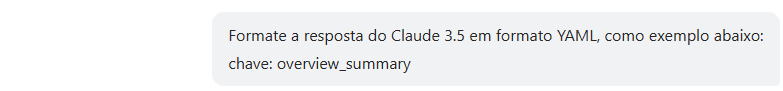

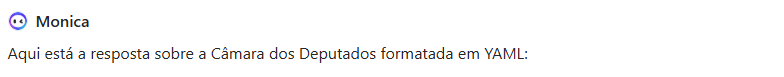

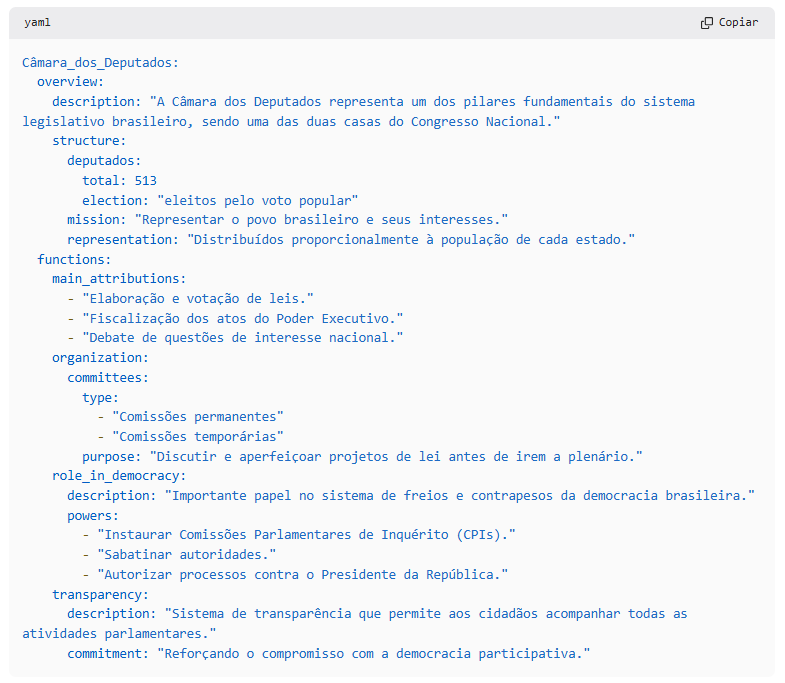

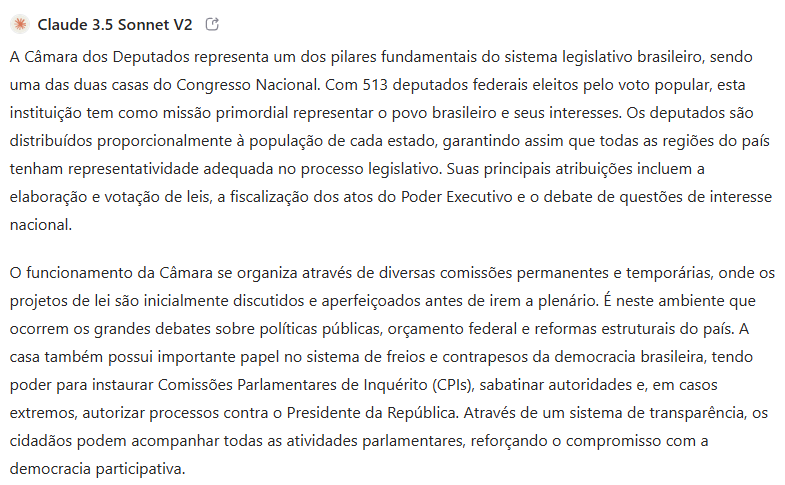

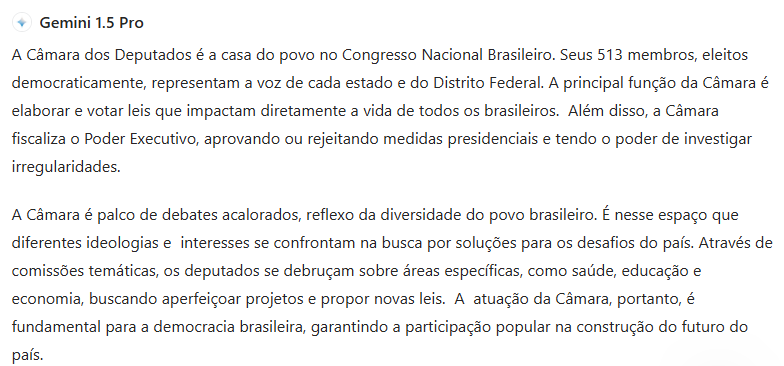

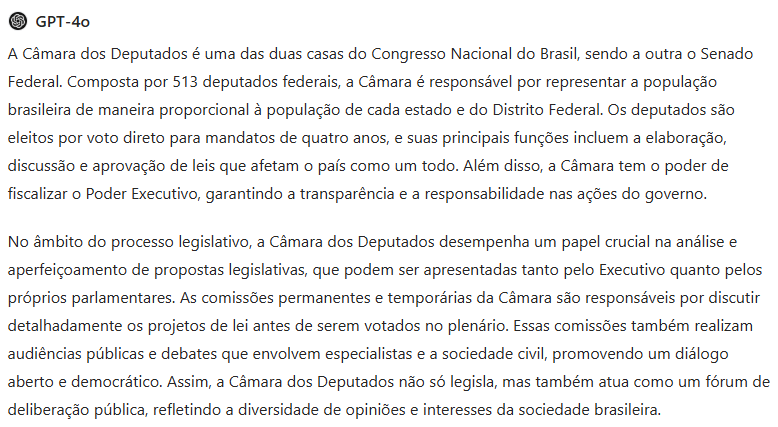

## Exercício 3 Processamento dos dados de deputados

Implemente em dataprep.py uma função que faça a coleta das informações dos deputados atuais da câmara dos deputados:
   - a. Colete e salve os dados dos deputados atuais da câmara no arquivo data/deputados.parquet através da url: url_base+/deputados.
   - b. Executar prompt para criar o código que gere um gráfico de pizza com o total e o percentual de deputados de cada partido, salvo em 'docs/distribuicao_deputados.png'.
   - c. Executar prompt utilizando os resultados da análise anterior (distribuição de deputados por partido) para gerar insights sobre a distribuição de partidos e como isso influencia a câmara. 
      - Utilize os elementos de prompts dados, persona e exemplos para instruir o LLM. 
      - Explique o objetivo de cada elemento, avalie a resposta e salve-a em data/insights_distribuicao_deputados.json.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta
#### Objetivo de cada elemento
- **Dados**: Informações a serem analisadas. Dados fornecidos em formato json com quebra de linha, para melhor compreensão do modelo.
- **Persona**: "You are a political data analyst". A persona ajusta o estilo e o tom da resposta.
- **Exemplos**: Foram fornecidos 3 exemplos de insights auxiliar o modelo a gerar respostas consistentes e alinhadas à expectativa.
#### Avaliação da resposta
O modelo gerou uma resposta muito mais completa que os exemplos passados, a intepretação dos valores está correta e conseguiu complementar muito bem com analises sobre como a concentração de poder em certas coligações pode influenciar na aprovação legislativa.

In [25]:
import sys
import os
sys.path.append(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT')
from app.dataprep import *

df = get_deputados()
df.head(2)

id                                                uri            nome  \
0  220593  https://dadosabertos.camara.leg.br/api/v2/depu...  Abilio Brunini   
1  204379  https://dadosabertos.camara.leg.br/api/v2/depu...  Acácio Favacho   

  siglaPartido                                         uriPartido siglaUf  \
0           PL  https://dadosabertos.camara.leg.br/api/v2/part...      MT   
1          MDB  https://dadosabertos.camara.leg.br/api/v2/part...      AP   

   idLegislatura                                            urlFoto  \
0             57  https://www.camara.leg.br/internet/deputado/ba...   
1             57  https://www.camara.leg.br/internet/deputado/ba...   

                             email  
0  dep.abiliobrunini@camara.leg.br  
1  dep.acaciofavacho@camara.leg.br

In [12]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

path_deputados = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\deputados.parquet"
path_png = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\docs\distribuicao_deputados.png"
path_distribuicao = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\distribuicao_deputados.parquet"

prompt_1 = f"""
Você é um desenvolvedor Python e precisa criar um script em Python para implementar as instruções abaixo. Você tem um arquivo parquet no caminho {path_deputados}, com as seguintes colunas:

-id: identificador único do deputado
-uri: endpoint do id do deputado
-nome: nome do deputado
-siglaPartido: sigla do partido
-uriPartido: endpoint do partido
-siglaUf: sigla do estado
-idLegislatura: identificador do período legislativo
-urlFoto: endpoint da foto do deputado
-email: e-mail do deputado

Instruções:
1.Importe o arquivo "deputados.parquet" como um DataFrame chamado df.
2.Calcule a porcentagem de deputados de cada partido.
3.Reinicie o índice e salve o resultado como um arquivo parquet no caminho {path_distribuicao}.
4.Crie um gráfico de pizza mostrando o total e a distribuição de deputados de cada partido.
5.Salve o gráfico como um arquivo .png, no caminho {path_png}.
6.Adicione uma docstring com a descrição das colunas e variáveis.
7.Saia apenas com o código, sem necessidade de explicações.
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_1 = model.generate_content(prompt_1)
resp_1 = resp_1.text.replace("```python\n",'').replace("\n```",'')
print(resp_1)

"""
Este script calcula a porcentagem de deputados por partido, 
gera um gráfico de pizza da distribuição e salva os resultados em arquivos parquet e png.

Colunas do DataFrame:
- id: identificador único do deputado
- uri: endpoint do id do deputado
- nome: nome do deputado
- siglaPartido: sigla do partido
- uriPartido: endpoint do partido
- siglaUf: sigla do estado
- idLegislatura: identificador do período legislativo
- urlFoto: endpoint da foto do deputado
- email: e-mail do deputado

Variáveis:
- df: DataFrame contendo os dados dos deputados.
- distribuicao_partidos: Série com a porcentagem de deputados por partido.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos dos arquivos
parquet_file = r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\deputados.parquet'
output_parquet = r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\distribuicao_deputados.parquet'
output_png = r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\docs\distribuicao_

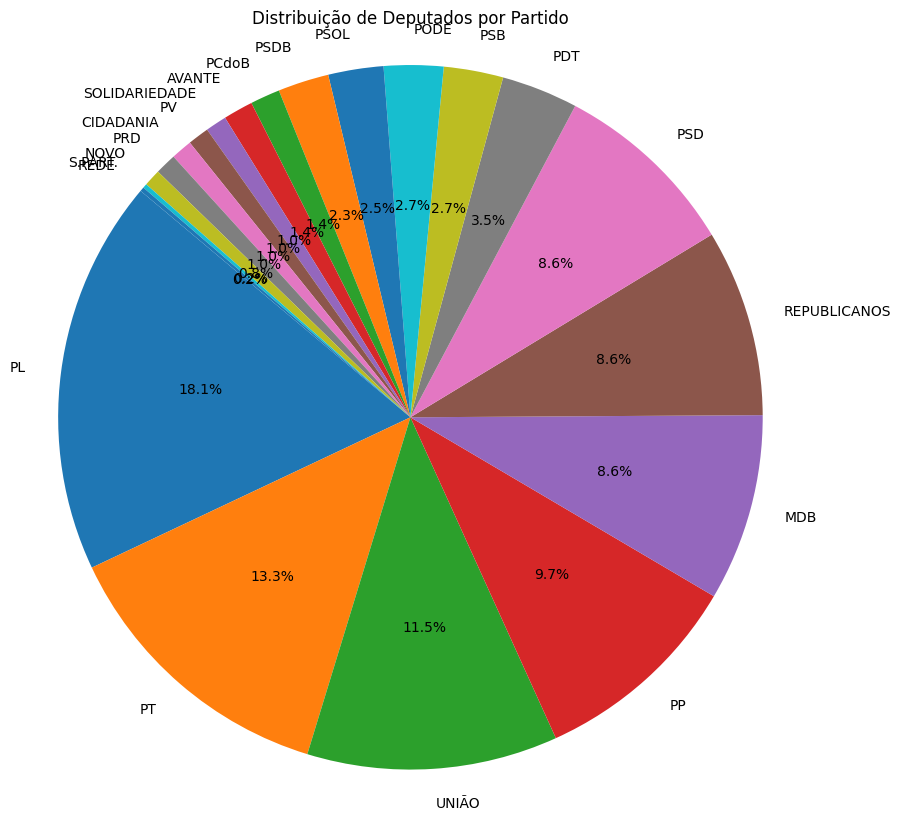

In [ ]:
exec(resp_1)

In [98]:
import json
import pandas as pd

df = pd.read_parquet('../app/data/distribuicao_deputados.parquet')
json_resultado = df.to_json(orient='records', lines=True)

prompt_2 = f"""
### 
{json_resultado}
### 

Você é um analista de dados políticos.
Com base na tabela acima, gere insights sobre a distribuição de deputados por partido e como isso pode influenciar a Câmara dos Deputados.
Sempre que utilizar percentuais, também informe os valores absolutos.

Exemplo de insights:
- O partido com mais representantes é o XXX, com YYY deputados.
- O partido com menos representantes é o XXX, com YYY deputados.
- 80% dos deputados são dos partidos XXX, YYY, ZZZ.
"""

resp_2 = model.generate_content(prompt_2)

data = {"text": resp_2.text}

with open('../app/data/insights_distribuicao_deputados.json', 'w') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)
    
print(resp_2.text)

Análise da Distribuição de Deputados na Câmara:

A tabela apresenta a distribuição percentual de deputados por partido na Câmara. Para gerar insights significativos, precisamos assumir um número total de deputados na Câmara.  Vamos supor, para fins ilustrativos, que existam 513 deputados (um número próximo à realidade).  Com essa suposição, podemos calcular os números absolutos de deputados por partido.


**Insights:**

* **Maioria e Minoria:** O partido com mais representantes é o **PL**, com aproximadamente 93 deputados (18.13% de 513 ≈ 93). O partido com menos representantes é o **REDE** e o **S.PART.**, ambos com aproximadamente 1 deputado (0.19% de 513 ≈ 1).

* **Concentração de Poder:**  Os três maiores partidos (PL, PT e UNIÃO) concentram uma parcela significativa do poder legislativo.  Juntos, eles detêm aproximadamente 43% dos assentos (PL: 93, PT: 68, UNIÃO: 59, totalizando aproximadamente 220 deputados).  Isso significa que a formação de qualquer maioria dependerá fortemente

## Exercício 4 Processamento dos dados de despesas

Implemente em dataprep.py uma função que colete as informações das despesas dos deputados atuais da câmara dos deputados no período de referência da solução (use a url: url_base+/deputados/{id}/despesas).
   - a. Agrupe os dados de despesas por dia, deputado e tipo de despesa e salve num arquivo parquet (data/serie_despesas_diárias_deputados.parquet).
   - b. Utilizando a técnica de prompt-chaining, crie um prompt que instrua o LLM a gerar um código python que analise os dados das despesas dos deputados. Peça para o LLM até 3 análises. Indique ao LLM quais dados estão disponíveis e o respectivo arquivo (salvo em a)) e execute as análises.
   - c. Utilize os resultados das 3 análises para criar um prompt usando a técnica de Generated Knowledge para instruir o LLM a gerar insights. Salve o resultado como um JSON (data/insights_despesas_deputados.json).

### Argrupando os dados

In [20]:
import sys
import os
sys.path.append(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT')
from app.dataprep import *

df = get_despesas()
df.head(2)

name        date                   expense_type  net_value
0  AJ Albuquerque  2024-08-01  COMBUSTÍVEIS E LUBRIFICANTES.     596.79
1  AJ Albuquerque  2024-08-02  COMBUSTÍVEIS E LUBRIFICANTES.     714.90

### Prompt 1 - Gerar Script Python para Executar as Analises

In [ ]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

path_despesas = r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\serie_despesas_diárias_deputados.parquet'

prompt_1 = f"""
Você é um cientista de dados analisando o histórico de gastos dos deputados em 2024.
Você tem um arquivo parquet no caminho {path_despesas}, com as seguintes colunas:

- name: Nome do deputado.
- date: Data da ocorrência da despesa como uma string no formato 'YYYY-MM-DD'.
- expense_type: Classificação do tipo de despesa.
- net_value: Valor da despesa.

Instruções:
1.Implemente as 3 análises descritas abaixo em Python.
2.Use variáveis (Analysis1, Analysis2, Analysis3) para armazenar o dataframe processado de cada análise em formato json (Parâmetros: lines=True, force_ascii=False).
3.Use variáveis (docAnalysis1, docAnalysis2, docAnalysis3) para armazenar o título de cada análise e a descrição das colunas no dataframe relacionado.
4.Saia apenas com o código, sem necessidade de explicações.


## ANÁLISES
    1.Média de Gastos por Deputado
    2.Total de Despesas por Tipo
    3.Total de Gastos Mensais por Deputado
"""

genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_1)
script = response.text.replace("```python\n",'').replace("\n```",'')
print(script)

import pandas as pd
import json

file_path = r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\serie_despesas_diárias_deputados.parquet'

try:
    df = pd.read_parquet(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.strftime('%Y-%m')

    # Análise 1: Média de Gastos por Deputado
    Analysis1 = df.groupby('name')['net_value'].mean().reset_index().to_json(orient='records', lines=True, force_ascii=False)
    docAnalysis1 = {
        'title': 'Média de Gastos por Deputado',
        'columns': {
            'name': 'Nome do Deputado',
            'net_value': 'Média de Gastos'
        }
    }

    # Análise 2: Total de Despesas por Tipo
    Analysis2 = df.groupby('expense_type')['net_value'].sum().reset_index().to_json(orient='records', lines=True, force_ascii=False)
    docAnalysis2 = {
        'title': 'Total de Despesas por Tipo',
        'columns': {
            'expense_type': 'Tipo de Despesa',
            'net_value': 'Total de Gast

### Executando o Script

In [22]:
exec(script)

list_docs = [docAnalysis1, docAnalysis2, docAnalysis3]
list_datasets = [Analysis1, Analysis2, Analysis3]

### Prompt 2  - Detalha os insights que precisam ser obtidos, já considerando os campos disponíveis

In [23]:
results = []

prompt_2 = f"""
Você é um cientista de dados em busca de insights no histórico de gastos dos deputados em 2024.
Abaixo estão listadas 3 análises e as colunas do dataframe disponível para cada uma.
Defina 1 insight que pode ser obtido para cada análise.
A saída deve ser um arquivo JSON com a seguinte estrutura:

{[
    {'analysis_title': 'título da análise',
     'insight': 'O insight que pode ser obtido da análise'
    }
]}

Análises:
{list_docs}
"""

genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_2)
insights = response.text
insights = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
insights

[{'analysis_title': 'Média de Gastos por Deputado',
  'insight': 'Identificar os deputados com gastos médios significativamente acima ou abaixo da média da Câmara, permitindo investigar possíveis discrepâncias e justificativas para tais variações.'},
 {'analysis_title': 'Total de Despesas por Tipo',
  'insight': 'Determinar quais tipos de despesas consomem a maior parte do orçamento público, auxiliando na identificação de áreas potenciais para otimização de recursos ou revisão de políticas.'},
 {'analysis_title': 'Total de Gastos Mensais por Deputado',
  'insight': 'Analisar a evolução dos gastos de cada deputado ao longo do ano, detectando possíveis padrões sazonais ou anomalias que mereçam investigação mais aprofundada.'}]

### Prompt 3 - Passa os dados para que sejam respondidas as perguntas

In [116]:
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")

results = []
for i, dataset in enumerate(list_datasets):
    prompt_3 = f"""
    Instruções:

    1.Analise os [DADOS] e tente responder: {insights[i]['insight']}.
    2.Adicione uma resposta descritiva do insight baseado em dados ao JSON.
    3.Cada resposta deve conter no máximo 1 parágrafo.
    4.Não adicione o dataset ao arquivo JSON.
    5.Responda um JSON com dicionários no seguinte formato: {{"resposta": "XXXX"}}

    ARQUIVO JSON:
    {insights[i]}

    DADOS:
    ###
    {list_datasets[i]}
    ###
    """

    response = model.generate_content(prompt_3)
    insight = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
    results.append(insight)

with open('../app/data/insights_despesas_deputados.json', 'w') as json_file:
    json.dump(results, json_file, ensure_ascii=False, indent=4)

In [117]:
print(json.dumps(results, indent=4, ensure_ascii=False))

[
    {
        "resposta": "A análise dos gastos médios dos deputados revela grandes discrepâncias.  Deputados como Glaustin da Fokus (20394.5), Antônio Doido (13123.43), e Giacobo (11277.06) apresentaram gastos significativamente acima da média, enquanto outros, como  Carlos Jordy (-843.51),  Fábio Macedo (-1846.1), e Rui Falcão (-2153.83), registraram valores consideravelmente abaixo, indicando a necessidade de investigação sobre as razões dessas diferenças."
    },
    {
        "analysis_title": "Total de Despesas por Tipo",
        "insight": "Determinar quais tipos de despesas consomem a maior parte do orçamento público, auxiliando na identificação de áreas potenciais para otimização de recursos ou revisão de políticas.",
        "resposta": "As maiores despesas são com 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR' (R$ 3.459.920,35), 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR' (R$ 2.570.355,25), 'COMBUSTÍVEIS E LUBRIFICANTES' (R$ 1.316.519,40) e 'LOCAÇÃO OU FRETAMENTO DE

## Exercício 5 Processamento dos dados de proposições

Implemente em dataprep.py uma função que faça a coleta das informações das proposições que tramitam no período de referência (dataInicio e dataFim) e são do tema 'Economia', 'Educação' e 'Ciência, Tecnologia e Inovação' (códigos [40, 46, 62]).
   - a. Coletar um total de 10 proposições por tema e salvar em data/proposicoes_deputados.parquet.
   - b. Utilize a sumarização por chunks para resumir as proposições tramitadas no período de referência. Avalie a resposta e salve-a em data/sumarizacao_proposicoes.json.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta
Para a criação dos chunks foi utilizado o conteúdo completo de cada proposição, disponibilizado em PDF via API da Câmara. Devido a formatação destes arquivos, com muitas quebras de linhas e linhas em branco, sequências inteiras somente com nomes de membros, códigos e referências a outros documentos, foi necessário um pré-tratamento mais extenso. Também foi necessário encontrar um tamanho para a janela e para a interpolação que melhor se adequasse a todos os documentos, de forma que não houvessem documentos com apenas 1 chunk enquanto outros estivessem com 50.

Após encontrado o equilíbrio na configuração dos parâmetros, o modelo conseguiu criar bons resumos para cada chunk, compreendendo bem o conteúdo mesmo quando não era relevante, e a sumarização final foi capaz de captar quais partes eram de fato relevantes para a descrever a Proposição. Os resumos finais ficaram consistêntes e concisos.  

In [ ]:
import sys
import os
sys.path.append(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT')
from app.dataprep import *

#Faz o request à API e coleta as proposições
df = get_proposicoes()

#Cria os chunks e realiza a sumarização de cada um
list_chunksPorProposicao = criar_chunks_por_proposicao(df)

#Sumariza cada chunk
dict_summaries = sumarizar_chunks(list_chunksPorProposicao)

#Condensa os resumos dos chunks em um único resumo da Proposição e salva em um arquivo JSON
sumarizacao_final(dict_summaries)

## Exercício 6 Dashboards com Chain-of-thoughts

Utilize 3 etapas de Chain-of-Thought prompting para escrever o código inicial do dashboard, destacando as abas Overview, Despesas e Proposições. 
Explique o objetivo de cada prompt na evolução do código até o arquivo dashboard.py final:
   - a. A aba Overview deve possuir um título e descrição da solução de sua escolha.
   - b. O painel deve mostrar o texto sumarizado em config.yaml.
   - c. O painel deve mostrar o gráfico de barras em docs/distribuicao_deputados.png.
   - d. O painel deve mostrar os insights do LLM sobre a distribuição de deputados em data/insights_distribuicao_deputados.json.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Reposta
**Obs:** No exercício 3 havia sido solicitado que o "distribuicao_deputados.png" fosse um gráfico de pizza.
- **Prompt 1:** O Objetivo do primeiro prompt era que o modelo explicasse como criar um aplicativo streamlit com as abas necessárias.
- **Prompt 2:** Teve como objetivo que o modelo explicasse como realizar importações dos tipos de arquivos necessários e como os exibir. Foi passado como forma de contexto o histórico do primeiro prompt e da primeira resposta.
- **Prompt 3:** O objetivo foi executar as instruções das respostas anteriores criando único script. Além do histórico das mensagens anteriores, também foi passado neste prompt os caminhos necessários para cada importação.

### Prompt 1 - Instrução de Criação do APP e Páginas

In [ ]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

prompt_1 = """
    Você é um professor universitário ensinando a criar dashboards em Python usando Streamlit e eu sou seu aluno.
    Me instrua a como executar as etapas abaixo, você não deve escrever códigos python, apenas as instruções:
    1.Criar um aplicativo streamlit.
    2.Adicionar três abas: Overview, Despesas e Proposições.
        2.1.Explique porque ocorre o erro  'method' object is not subscriptable quando é utilizado o código abaixo:
        overview_tab = st.tabs(["Overview", "Despesas", "Proposições"])[0] 
        aba.tabs[1]
    3.Adicionar na aba Overview um título "Portal de Governança da Câmara" e a descrição "Este aplicativo visa facilitar a governança da Câmara de Deputados, permitindo o acompanhamento dos políticos com mandatos vigentes, suas despesas e propostas."
    
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_1 = model.generate_content(prompt_1)
resp_1 = resp_1.text
print(resp_1)

c:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Olá, aluno! Vamos construir um dashboard em Streamlit. Siga estas instruções passo a passo:

1. **Criar um aplicativo Streamlit:**  Primeiro, crie um novo arquivo Python (por exemplo, `governo_dashboard.py`).  Certifique-se de ter o Streamlit instalado (`pip install streamlit`).  Este arquivo conterá todo o código do seu dashboard.

2. **Adicionar três abas:**  Usaremos a função `st.tabs` do Streamlit para criar as abas "Overview", "Despesas" e "Proposições".  **Não** use colchetes `[]` para acessar as abas individualmente como no exemplo errado que você forneceu.  A função `st.tabs` retorna um objeto que *não* é uma lista, então você não pode indexá-lo diretamente usando colchetes. O erro `'method' object is not subscriptable` ocorre exatamente por tentar acessar o objeto retornado por `st.tabs` como se fosse uma lista, usando a sintaxe de indexação (`[]`).  A forma correta é usar a função `st.tabs` para criar o grupo de abas, e então utilizar cada aba como um *contexto* dentro de um 

### Prompt 2 - Instrução Sobre Importações

In [2]:
prompt_2 = f"""
    Analise o [HISTÓRICO DE MENSAGENS], onde estão registradas as perguntas que fiz anteriormente e as respostas que você já me passou, e complemente de seguimento respondendo à solicitação no [NOVO PROMPT], você não deve escrever códigos python, apenas fornecer instruções:
    
    MENSAGENS ANTERIORES:
        1° PROMPT:{prompt_1} 

        1° REPOSTA: {resp_1}

    NOVO PROMPT:
    1.Explique como importar um arquivo do tipo .yaml e exibir o conteúdo na interface streamlit.
        1.1 - Como exibir o arquivo "config.yaml" como uma string com quebras de linha, em uma área com altura=500.
    2.Explique como importar uma imagem local e exibi-la na interface streamlit.
    3.Explique como importar um arquivo .json e exibir o conteúdo na interface streamlit.
        3.2 - Como exibir o arquivo "insights_distribuicao_deputados.json". Sabendo que é um json com um único campo "text" que contém uma string já formatada como markdown.
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_2 = model.generate_content(prompt_2)
resp_2 = resp_2.text
print(resp_2)

1. **Importar e exibir arquivo YAML:**

   1. **Importação:**  Utilize a biblioteca `PyYAML`. Instale-a se necessário (`pip install pyyaml`).  Em seu script Streamlit, importe-a com `import yaml`.  Abra o arquivo YAML usando `with open('config.yaml', 'r') as file:` e carregue o conteúdo em um dicionário Python com `yaml.safe_load(file)`.  A função `yaml.safe_load` é preferível por questões de segurança.

   1.1 **Exibição como string com quebras de linha:** Converta o dicionário para uma string representando o conteúdo YAML com quebras de linha usando  `yaml.dump(seu_dicionario_yaml)`.  Então, use `st.text_area(yaml_string, height=500)` para exibir o conteúdo no Streamlit, limitando a altura da área de texto a 500 pixels.  `seu_dicionario_yaml` representa a variável que contém o conteúdo do arquivo YAML carregado.


2. **Importar e exibir imagem local:**

   1. **Importação:** Use a biblioteca `PIL` (Pillow) para lidar com a imagem. Instale-a se necessário (`pip install Pillow`). Impor

### Prompt 3 - Execução das Instruções, Criando Efetivamente o Script

In [3]:
prompt_3 = f"""
    Analise o [HISTÓRICO DE MENSAGENS], onde estão registradas as perguntas que fiz anteriormente e as respostas que você já me passou, adicionando as solicitações passadas no [NOVO PROMPT]. Nesta etapa você deve criar os códigos para todas as instruções prévias:

    MENSAGENS ANTERIORES:
        1° PROMPT:{prompt_1} 

        1° REPOSTA: {resp_1}

        2° PROMPT:{prompt_2} 
    
        2° REPOSTA: {resp_2}

    NOVO PROMPT:
    1.Importar o arquivo 'data/config.yaml', definir allow_unicode=True, exibir seu conteúdo na aba 'Overview', dê o título de 'Visão Geral da Câmara dos Deputados'. Não use o parámetro Loader.
    2.Importar o arquivo '../docs/distribuicao_deputados.png' e exibir seu conteúdo na aba 'Overview', dê o título de 'Distribuição dos Deputados por Partido'.
    3.Importar o arquivo 'data/insights_distribuicao_deputados.json' e exibir seu conteúdo na aba 'Overview', dê o título de 'Análise da Distribuição de Deputados por Partido'.
    4.Responda apenas o código consolidado, sem necessidade de explicações.
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_3 = model.generate_content(prompt_3)
resp_3 = resp_3.text.replace("```python\n",'').replace("\n```",'')
print(resp_3)

import streamlit as st
import yaml
from PIL import Image
import json

st.set_page_config(page_title="Portal de Governança da Câmara", page_icon=":bar_chart:")

tabs = st.tabs(["Overview", "Despesas", "Proposições"])

with tabs[0]:
    st.title("Portal de Governança da Câmara")
    st.write("Este aplicativo visa facilitar a governança da Câmara de Deputados, permitindo o acompanhamento dos políticos com mandatos vigentes, suas despesas e propostas.")

    st.title("Visão Geral da Câmara dos Deputados")
    try:
        with open('C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/config.yaml', 'r', encoding='utf-8') as file:
            yaml_data = yaml.safe_load(file)
            yaml_string = yaml.dump(yaml_data, allow_unicode=True)
            st.text_area("Configurações", yaml_string, height=500)
    except FileNotFoundError:
        st.error("Arquivo config.yaml não encontrado.")
    except yaml.YAMLError as e:
        st.error(f"Erro ao carregar o arquivo YAML: {e}")

    

In [ ]:
with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\app\dashboardV1.py', 'w') as f:
    f.write(resp_3)

os.system("streamlit run C:\\Users\\RodrigoPintoMesquita\\Documents\\GitHub\\DR4_AT\\app\\dashboard.py --server.port=8080 --browser.serverAddress='177.192.12.238'")

2

# Prints do Aplicativo Gerado

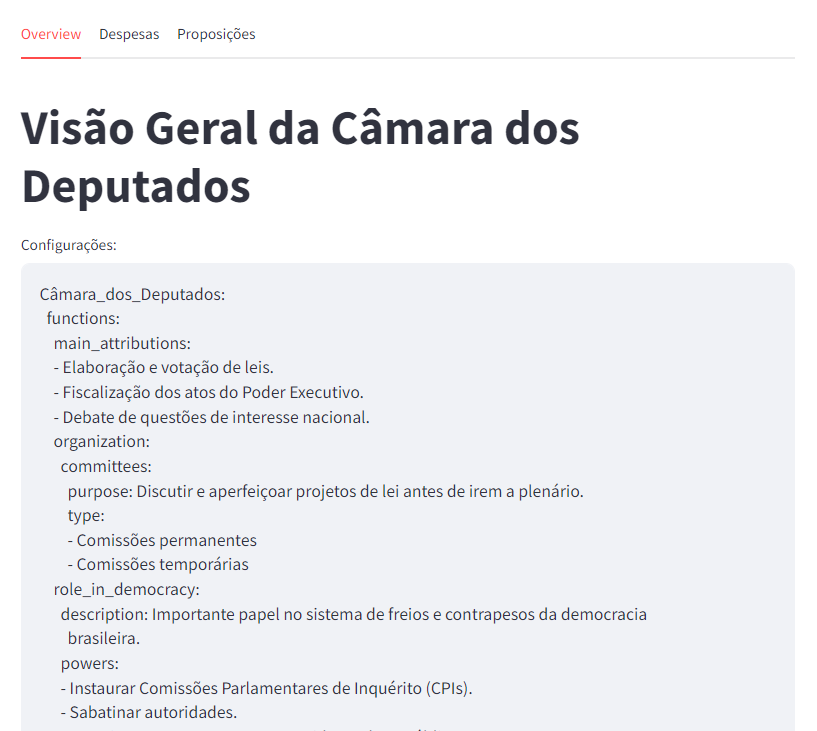

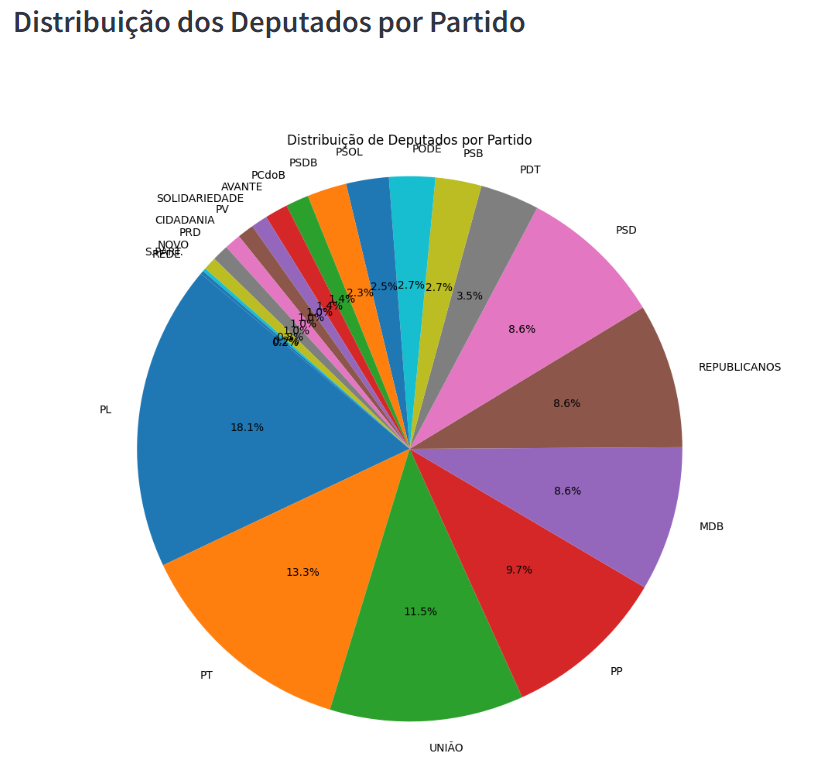

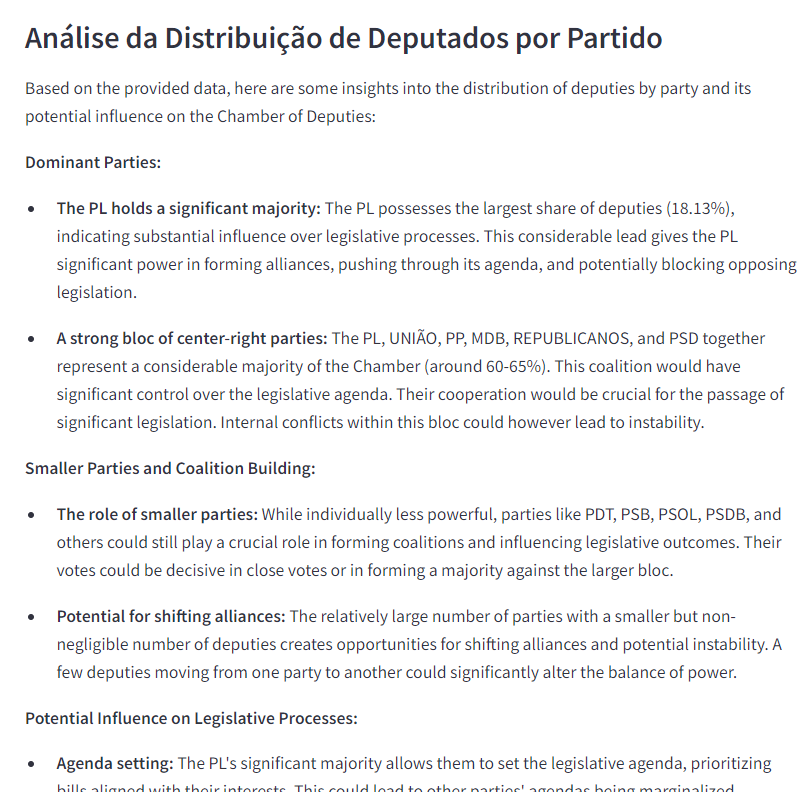

## Exercício 7 Dashboards com Batch-prompting

Utilize a técnica de Batch-prompting para escrever o código streamlit que preencha as abas Despesas e Proposições do código em dashboard.py. 
O prompt deve descrever com detalhes cada aba para geração de:
   - a. Aba Despesas deve mostrar os insights sobre as despesas dos deputados (data/insights_despesas_deputados.json).
   - b. Aba Despesas deve conter um st.selectbox para seleção do deputado.
   - c. Aba Despesas deve mostrar gráfico de barras com a série temporal de despesas do deputado selecionado (data/serie_despesas_diárias_deputados.parquet).
   - d. O painel deve mostrar uma tabela com os dados das proposições (data/proposicoes_deputados.parquet).
   - e. O painel deve mostrar o resumo das proposições em (data/sumarizacao_proposicoes.json).
   - f. Compare o resultado dos códigos gerados pelas técnicas de Chain-of-Thoughts e Batch-prompting.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta
**obs**: O arquivo dashboard.py foi renomeado para dashboardV1.py e dashboardV2.py, para que o resultado deste exercício não sobrescrevesse o resultado do exercício anterior, inviabilizando a reexecução isolada deste trecho de código.

* Os resultados gerados pelo Chain-of-Thoughts tendem a ter uma mudança constante ao rodar novamente o código, alternando entre bibliotecas utilizadas ou até mesmo sobre a forma com que se criavam as abas.
    * Devido ao erro na forma de criação das abas, foi adicionada instrução no primeiro prompt do Chain-of-Thoughts para que ele explicasse o próprio erro. Assim ele parou de criar daquela maneira.
* A execução do Prompt-Chaining é mais direta, menos suscetível à "criatividade" do modelo. Ao rodar novamente o modelo para os mesmos prompts, a resposta sofre pouca ou nenhuma variação, dando maior confiabilidade ao processo.
    * Devido ao tamanho do código gerado nas etapas anteriores, em algumas rodadas o modelo ignorou parte das instruções passadas no último prompt, como a solicitação para remover caracteres indesejados ou a solicitação para Adicionar um título antes do gráfico de despesas.

### Prompt 1 - Importação dos Arquivos Necessários e Exibição

In [ ]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\app\dashboardV1.py', 'r') as f:
    script_1 = f.read()

prompt_1 = f"""
Você é um desenvolvedor Python, e analisar o conteúdo do arquivo DASHBOARD.PY, complementando a criação do aplicativo Streamlit com as instruções abaixo:

INSTRUÇÕES GERAIS:
-Responda apenas o código consolidado, sem necessidade de explicações.
-Adicione Docstring com a descrição de cada variável, função e tipagem das colunas de cada dataframe. Não exiba a Docstring no aplicativo.

ADICIONAR NA ABA DESPESAS:
    1.Importar o arquivo 'data/insights_despesas_deputados.json' e exibir seu conteúdo:
        1.1.Adicionar o título 'Insights sobre Despesas dos Deputados'.
        1.2.O arquivo é uma lista de dicionários com os seguintes campos em cada dicionário [analysis_title (String), insight (f-string), highest_spending_categories (f-string:Campo opcional)].
        1.3.Em cada valor do Json devem ser removidas aspas, barras e cifrões.
        1.4.Cada dicionário deve ser exibido separadamente.
    2.Importar o arquivo 'data/serie_despesas_diárias_deputados.parquet' e adicionar a um dataframe, porém não o exiba no aplicativo.
        2.1.O arquivo possui as coluas [name (string), date (string), expense_type (string), net_value (float64)].

ADICIONAR NA ABA PROPOSIÇÕES:
    2.Importar o arquivo 'data/sumarizacao_proposicoes.json' e exibir seu conteúdo.
        2.1.Dê o título de 'Resumo das Proposições em Tramitação'
        2.2.Definir o encoding como UTF-8.
        2.3.Cada linha deve ser exibida separadamente e formatadas como markdown.
    5.Responda apenas o código consolidado, sem necessidade de explicações. 

CONTEÚDO DO ARQUIVO DASHBOARD.PY:

{script_1}

"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_1)
response_1 = response.text.replace("```python\n",'').replace("\n```",'')
print(response_1)


import streamlit as st
import yaml
from PIL import Image
import json
import pandas as pd

st.set_page_config(page_title="Portal de Governança da Câmara", page_icon=":bar_chart:")

tabs = st.tabs(["Overview", "Despesas", "Proposições"])

with tabs[0]:
    st.title("Portal de Governança da Câmara")
    st.write("Este aplicativo visa facilitar a governança da Câmara de Deputados, permitindo o acompanhamento dos políticos com mandatos vigentes, suas despesas e propostas.")

    st.title("Visão Geral da Câmara dos Deputados")
    try:
        with open('C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/config.yaml', 'r', encoding='utf-8') as file:
            yaml_data = yaml.safe_load(file)
            yaml_string = yaml.dump(yaml_data, allow_unicode=True)
            st.text_area("Configurações", yaml_string, height=500)
    except FileNotFoundError:
        st.error("Arquivo config.yaml não encontrado.")
    except yaml.YAMLError as e:
        st.error(f"Erro ao carregar o arqui

### Prompt 2 - Criação do Filtro e Gráfico

In [ ]:
prompt_2 = f"""

Você é um desenvolvedor Python, e analisar o conteúdo do arquivo DASHBOARD.PY, complementando a criação do aplicativo Streamlit com as instruções abaixo:

INSTRUÇÕES GERAIS:
-Responda apenas o código consolidado, sem necessidade de explicações.
-Adicione Docstring com a descrição de cada variável, função e tipagem das colunas de cada dataframe.

ADICIONAR NA ABA DESPESAS:
    1.Adicionar um st.selectbox para seleção de um deputado:
        1.1.Adicione o título 'Consultar histórico de despesas por deputado', antes do selectbox.
        1.2.Os valores do selectbox devem ser os nomes (name) dos deputados, contidos no arquivo "serie_despesas_diárias_deputados.parquet".
        1.3.O selectbox deve filtrar o dataframe que contem os dados do arquivo "serie_despesas_diárias_deputados.parquet", através da coluna "name".
    2.Adicionar um gráfico de barras com a soma das despesas em uma série temporal para o deputado selecionado no selectbox:
        2.1.O gráfico deve ter o título 'Despesas por Tipo de Despesa'.
        2.2.O eixo x deve conter o campo 'date' e ter o título 'Data da Despesa'.
        2.3.O eixo y deve conter o campo 'net_value' e ter o título 'Valor Total das Despesas'.

CONTEÚDO DO ARQUIVO DASHBOARD.PY:

{response_1}

"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_2)
response_2 = response.text.replace("```python\n",'').replace("\n```",'')
print(response_2)

import streamlit as st
import yaml
from PIL import Image
import json
import pandas as pd
import plotly.express as px

st.set_page_config(page_title="Portal de Governança da Câmara", page_icon=":bar_chart:")

tabs = st.tabs(["Overview", "Despesas", "Proposições"])

with tabs[0]:
    st.title("Portal de Governança da Câmara")
    st.write("Este aplicativo visa facilitar a governança da Câmara de Deputados, permitindo o acompanhamento dos políticos com mandatos vigentes, suas despesas e propostas.")

    st.title("Visão Geral da Câmara dos Deputados")
    try:
        with open('C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/config.yaml', 'r', encoding='utf-8') as file:
            yaml_data = yaml.safe_load(file)
            yaml_string = yaml.dump(yaml_data, allow_unicode=True)
            st.text_area("Configurações", yaml_string, height=500)
    except FileNotFoundError:
        st.error("Arquivo config.yaml não encontrado.")
    except yaml.YAMLError as e:
        st.erro

In [11]:
with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\app\dashboardV2.py', 'w') as f:
    f.write(response_2)

# Prints do Aplicativo Gerado

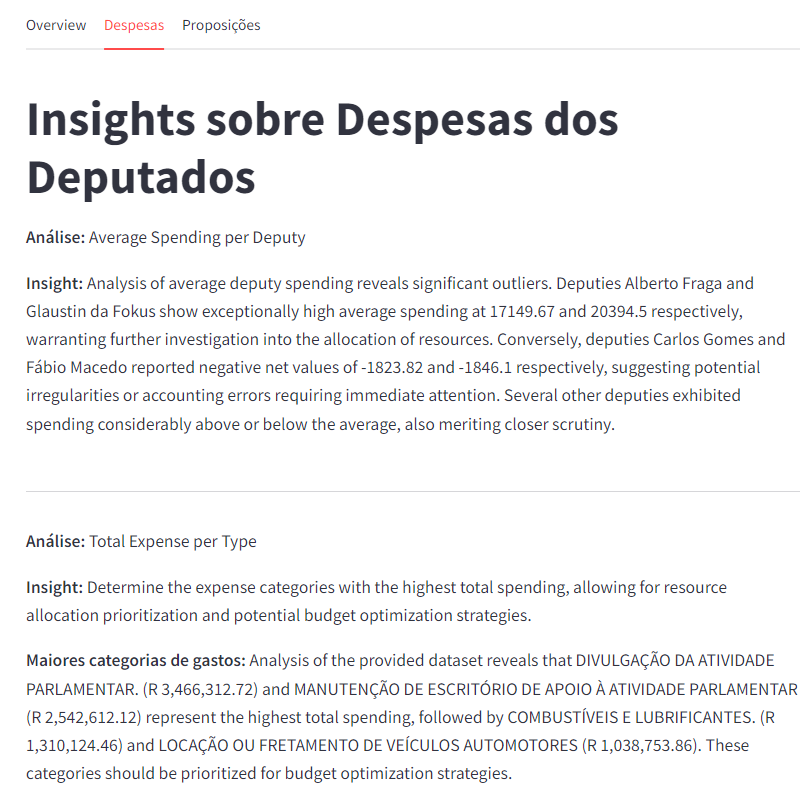

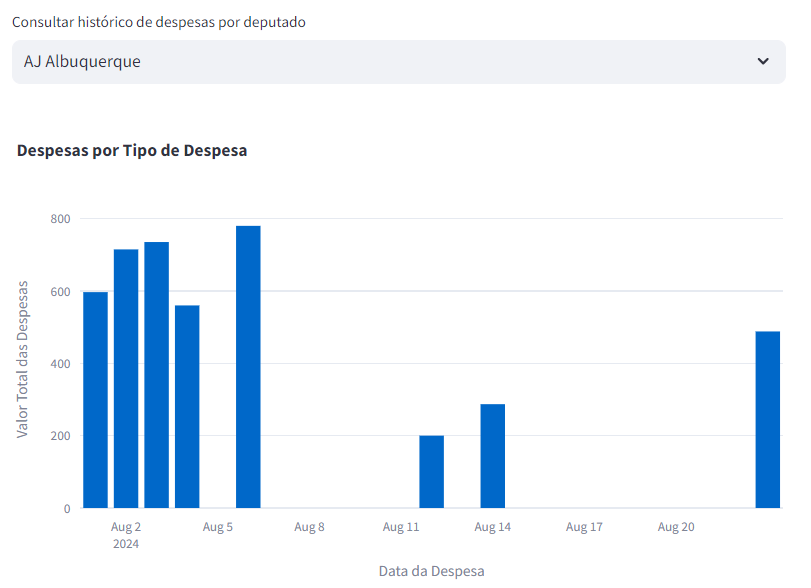

## Exercício 8 Assistente online com base vetorial

Adicione ao código da aba Proposições uma interface para chat com um assistente virtual especialista em câmara dos deputados. 

As informações coletadas dos deputados, despesas e proposições (e suas sumarizações) devem ser vetorizadas usando o modelo "neuralmind/bert-base-portuguese-cased" para armazenamento na base vetorial FAISS. 

O prompt do sistema para o assistente virtual deve ser feito com a técnica Self-Ask:
   - a. Explique como a técnica de self-ask pode ser utilizada nesse contexto.
   - b. Avalie o resultado do modelo para as seguintes perguntas:
      - I. Qual é o partido político com mais deputados na câmara?
      - II. Qual é o deputado com mais despesas na câmara?
      - III. Qual é o tipo de despesa mais declarada pelos deputados da câmara?
      - IV. Quais são as informações mais relevantes sobre as proposições que falam de Economia?
      - V. Quais são as informações mais relevantes sobre as proposições que falam de 'Ciência, Tecnologia e Inovação'?

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta
A técnica de self-ask pode ser utilizada para quebrar uma pergunta complexa em questões menores, que sirvam como etapas de raciocínio lógico para se obter a resposta final. A execução ocorre em duas etapas, na primeira, o modelo gera as perguntas menores e as responde, e na segunda iteração, o modelo utiliza as respostas anteriores para responder à pergunta inicial.

Entretanto, em um dos exemplos abaixo, ao tentar responder o tipo de despesa mais declarada o modelo se perdeu, criando uma pergunta intermediária que nada tinha a ver com a questão inicial. Este caso deu a entender que houve um "Vazamento" entre as instruções passadas e os dados fornecidos, ou seja, mesmo com a orientação explícita para que o modelo primeiro criasse as perguntas antes de analisar os dados, ele não o fez, e criou uma pergunta contaminada por um dos textos que foram retornados pelo FAISS, mas que não tinha ligação com a questão.

Uma alternativa seria quebrar a lógica em 3 etapas: 
1. Solicitar a quebra das questão original em questões menores.
2. Fornecer os dados e solicitar as respostas intermediárias somente no segundo request ao modelo
3. Solicitar a resposta da questão original.

Para os demais casos as respostas finais foram coerentes, apesar de algumas das perguntas intermediárias terem sido desnecessárias, não agregando à resposta final. Por exemplo, para responder a questão "*Qual é o deputado com mais despesas da câmara?*" foi gerada a pergunta "*Qual fonte de dados contém informações sobre as despesas de cada deputado da câmara?*".

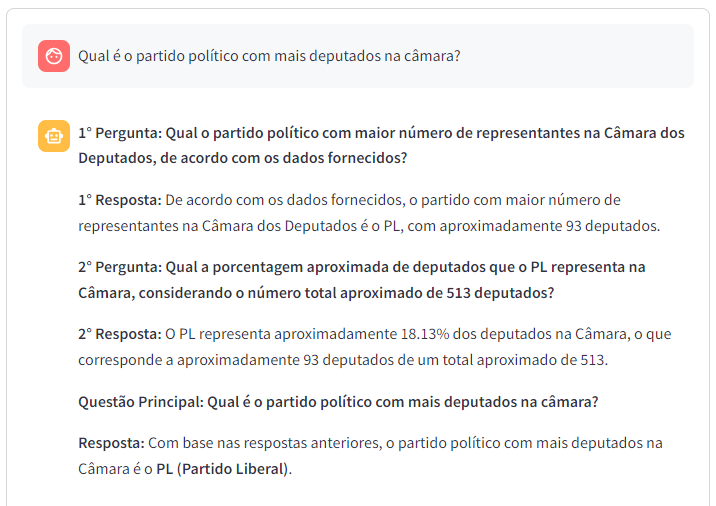

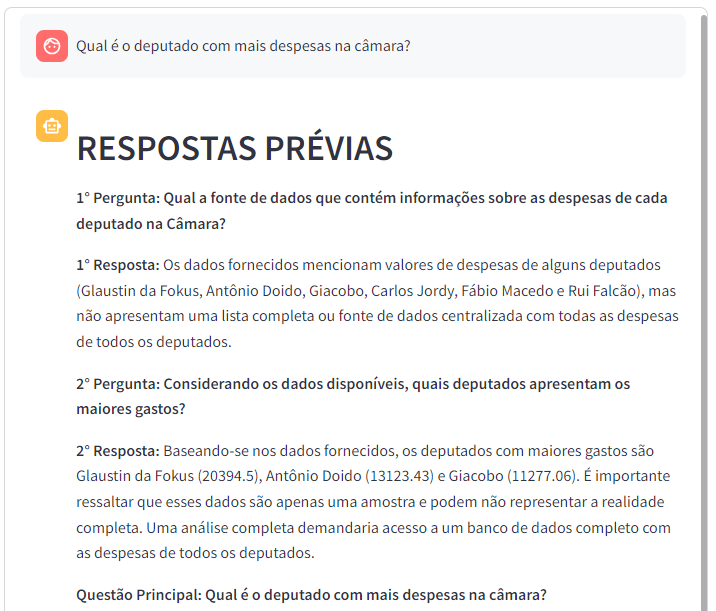

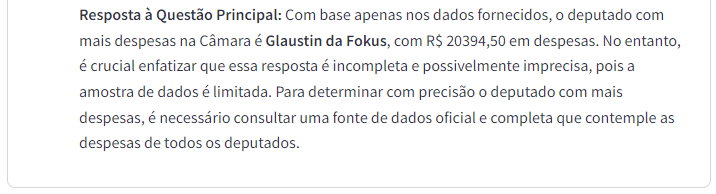

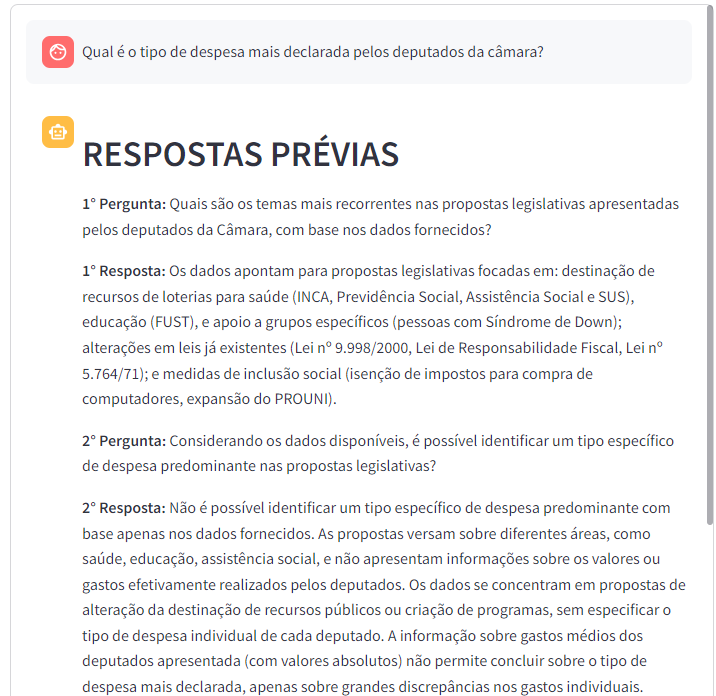

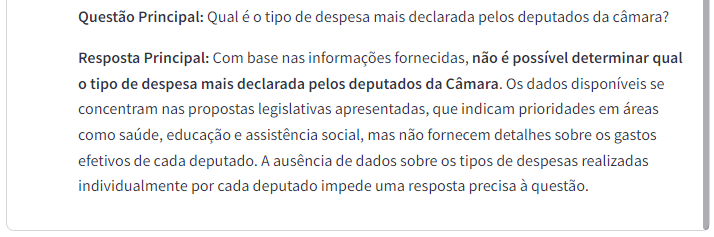

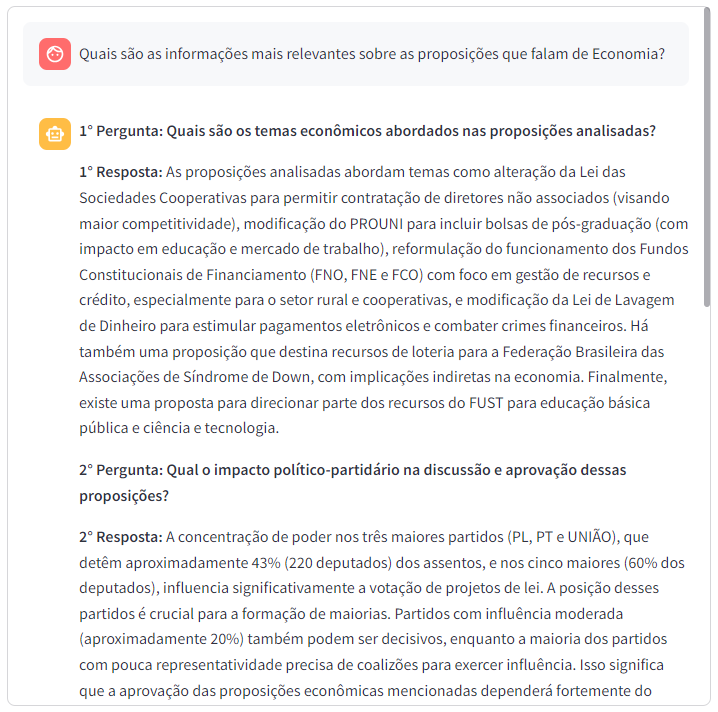

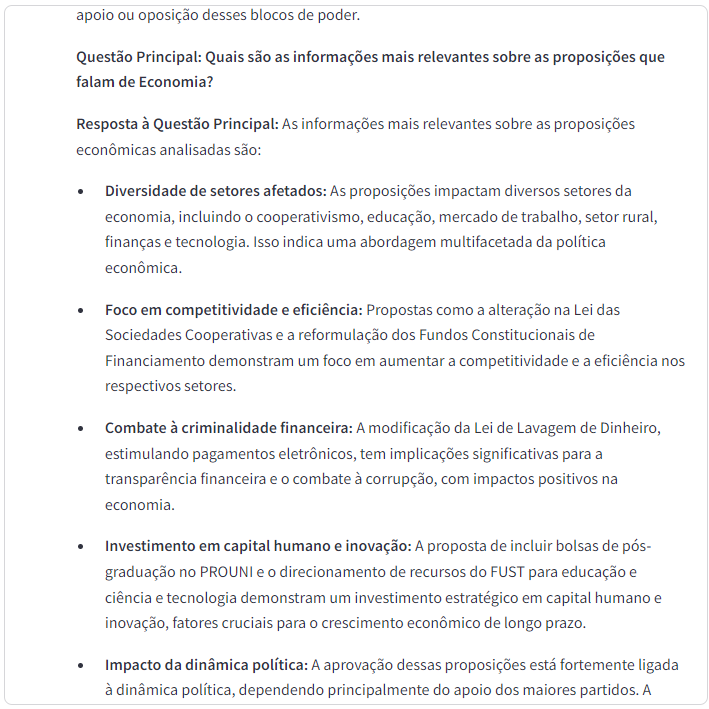

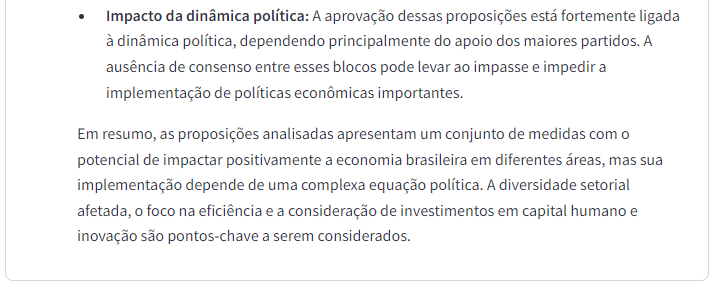

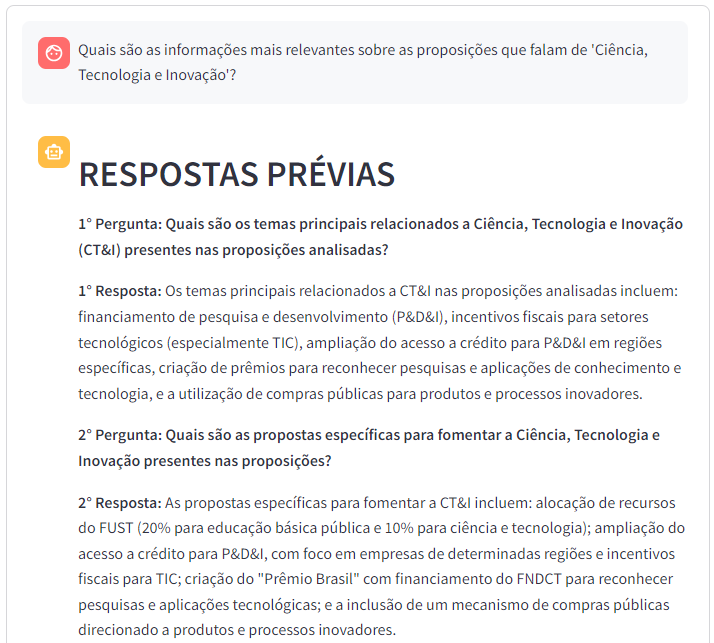

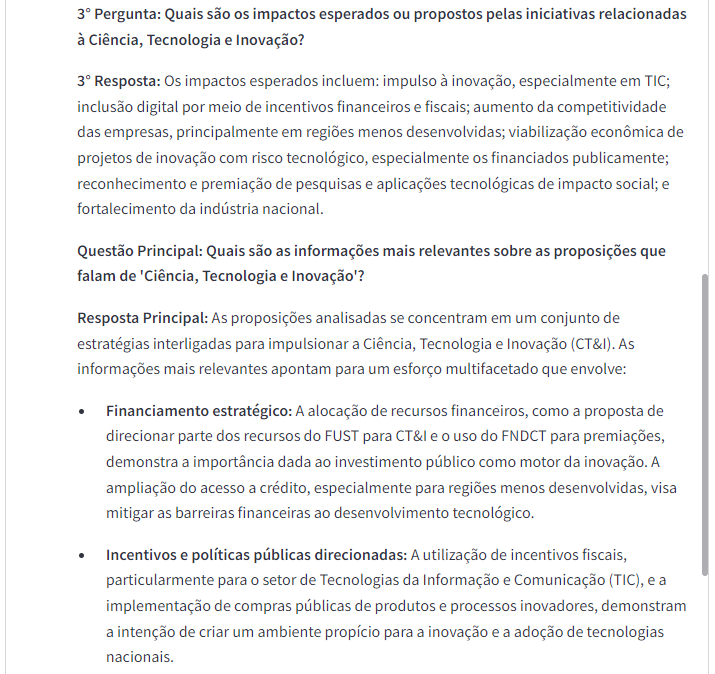

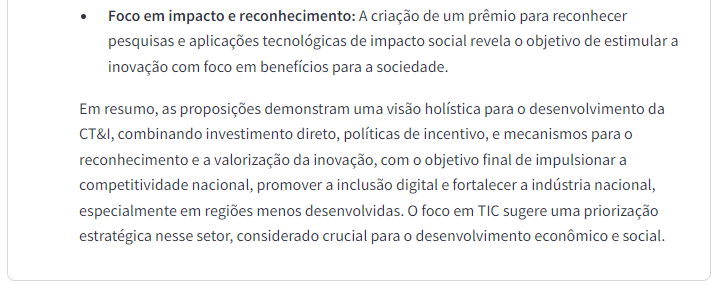

### Fiz o tratamento e junção dos arquivos antes do embedding, para passar um único arquivo.

In [119]:
#Cada Json está em um formato diferente, então está sendo necessário fazer a conversão manualmente deixando em um mesmo formato de lista.

unificar_datasets()

## Exercício 9 Geração de Imagens com Prompts

Utilizando as informações sumarizadas das proposições dos deputados, vamos gerar prompts que possam fazer alusão aos temas e o que está sendo proposto. 
Use o google Colab para gerar imagens com o modelo "CompVis/stable-diffusion-v1-4" para duas proposições de sua escolha. 
Com essas informações, responda:
   - a. Descreva o funcionamento dos modelo de imagem, segundo suas arquiteturas, limitações e vantagens:
      - I. Stable Diffusion
      - II. DALL-e
      - III. MidJourney
   - b. Utilize diferentes técnicas de “Estilo Visual” e “Composição”, além de exemplos com negative prompting, para gerar 3 versões de imagem para cada proposição e avalie...


<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Reposta
A principais características dos três modelos listados abaixo, é que utilizam a técnica de difussion durante o treino, que consiste em adicionar ruídos aleatórios à imagens e aprender a como removê-los de forma gradual até recompor a imagem original, e utilizam uma base vetorial para armazenamento dos resultados (Latent Space). Todos os padrões das imagens utilizadas no treino são convertidos em tokens, quando o usuário fornece um prompt textual, ele é primeiro convertido para tokens e comparado com os padrões armazenados na base vetorial, para encontrar as correspondências mais próximas ao que foi digitado.

#### Vantagens
- **Stable Diffusion:** É um modelo com resultados comparáveis ao DALL-E 2 e ao MidJourney, porém Open Source e muito eficiênte computacionalmente, demandando uma capacidade de processamento relativamente baixa em comparação a outros modelos de geração de imagens. Por ser open-source, permite fine-tuning em dados personalizados e maior nível de ajustes em seus parâmetros.
- **Dall-E:** O fato de ser embarcado no ChatGPT-4 aumenta muito a capacidade de interação e de integrações com Plugins do seu marketplace. 
- **MidJourney:**  Possui a melhor estética, tando para fantasia quando para fotorrealismo, sendo o modelo mais poderoso para trabalhos artísticos.

#### Desvantagens: 
- **Stable Diffusion:** Nas suas primeiras versões continha conteúdo NSFW, gerando discussões sobre ética e segurança, porém já na versão 2.0 houve melhorias, tendo sido aplicada filtragem de conteúdo no Dataset original de treino (LAION-5B).
- **Dall-E:** Os usuários tem pouco controle sobre o parâmetros do modelo, não podendo ser realizado fine-tunning com dados próprios. O modelo também enfrenta dificuldades com representações realistas de pessoas, especialmente ao gerar rostos, mãos e pés.
- **Mid Journey:** Não há nenhuma API para interação com o modelo, o seu uso se dá exclusivamente através do discord, e qualquer imagem gerada fica disponível para visualização de todos os usuários, exceto as imagens geradas no modo privado do plano de assinatura mais caro.



In [166]:
with open('../app/data/sumarizacao_proposicoes.json', 'r', encoding='utf-8') as file:
    texto = json.load(file)

input1 = texto[1]['summary']
input2 = texto[2]['summary']

prompt = f"""
    Crie 3 prompts de geração de imagem que faça alusão ao conteúdo da proposição legislativa abaixo.

    ## Instruções:
    - Deve ser criado apenas um único prompt, sem necessidade de explicações.
    - Os prompts devem ser curtos e objetivos.
    - Em cada prompt utilize um Estilos Visuais e Composições diferentes, que façam sentido ao conteúdo da Proposição.
    - O prompt deve ser em inglês.
    - Responda em formato YAML.

    ## Proposição Legislativa

"""

genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(f"{prompt}{input1}")

resp = response.text.replace("```yaml\nprompts:\n",'').replace("\n```\n",'').replace("  - prompt: ",'').replace('"','')
resp = list(resp.split('\n'))
resp

['A dynamic boardroom scene, futuristic style, depicting diverse individuals, some in formal attire, others in more casual business wear, collaborating around a holographic table showcasing cooperative growth charts. Focus on a balanced mix of associated and non-associated members.',
 'Photorealistic image: a sharply dressed non-member director addressing a serious, yet open-minded, board of cooperative members. Emphasize the contrasting styles of professional attire, showcasing a serious but hopeful transition.  Background should suggest a modern cooperative business environment.',
 'Abstract art: Interlocking gears and flowing lines symbolizing streamlined decision-making, with distinct color blocks representing members and non-member directors working in harmony, creating a vibrant sense of synergy and progress within a cooperative structure.']

In [167]:
response = model.generate_content(f"{prompt}{input2}")

resp = response.text.replace("```yaml\nprompts:\n",'').replace("\n```\n",'').replace("  - prompt: ",'').replace('"','')
resp = list(resp.split('\n'))
resp

['A complex network of interconnected nodes representing the flow of funds between the National Treasury, the Ministry of National Integration, financial institutions, and rural communities, visualized as a vibrant, data-rich infographic.',
 'A stylized, photorealistic image depicting a rural farmer receiving a loan from a cooperative bank, with a subtle background showing the government buildings and financial institutions involved in the process.',
 'An abstract representation of financial growth and equitable distribution, utilizing geometric shapes and contrasting colors to convey the streamlined process of resource allocation and increased access to credit in remote areas, presented in a minimalist design.']

## Prints do Google Colab

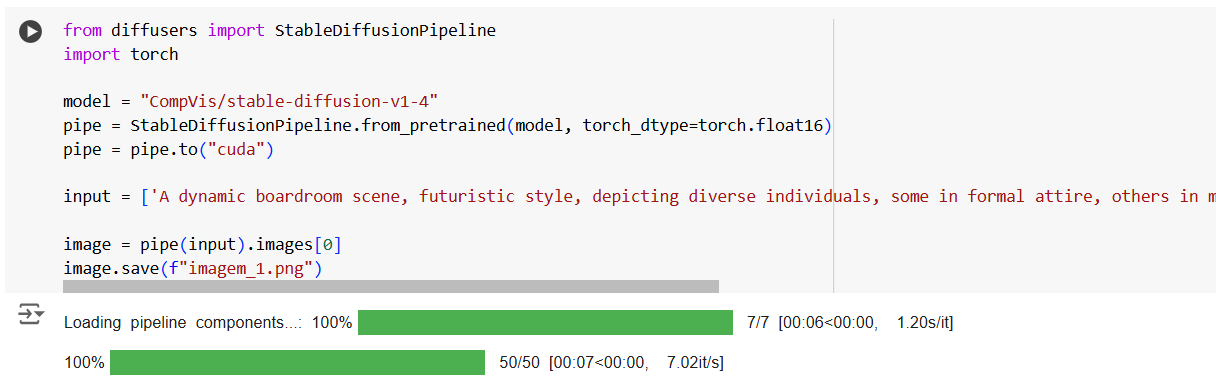


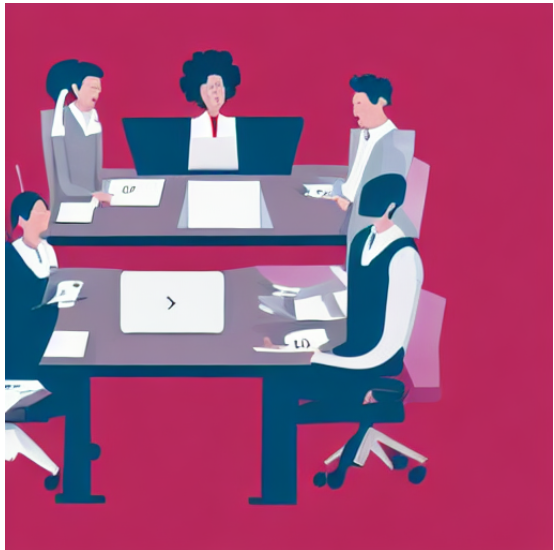

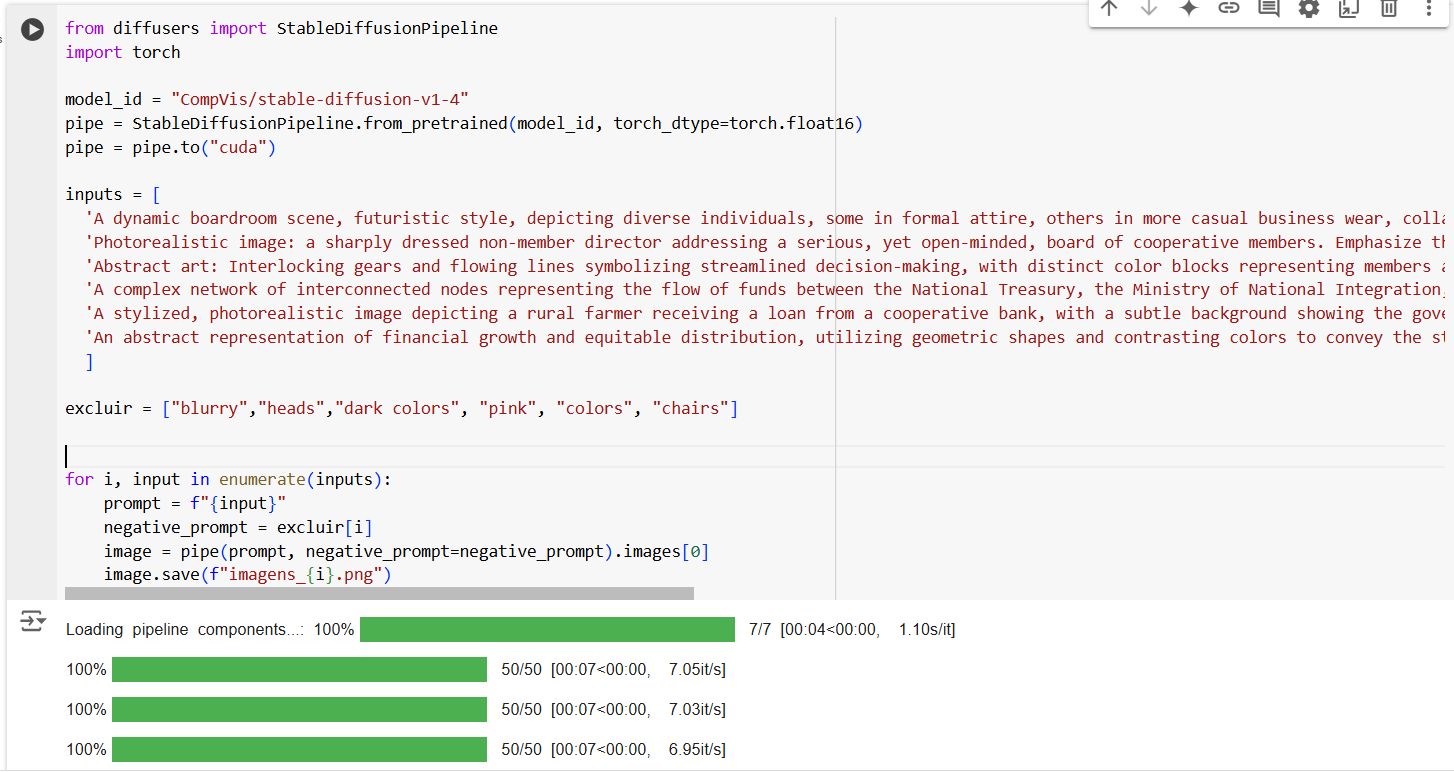

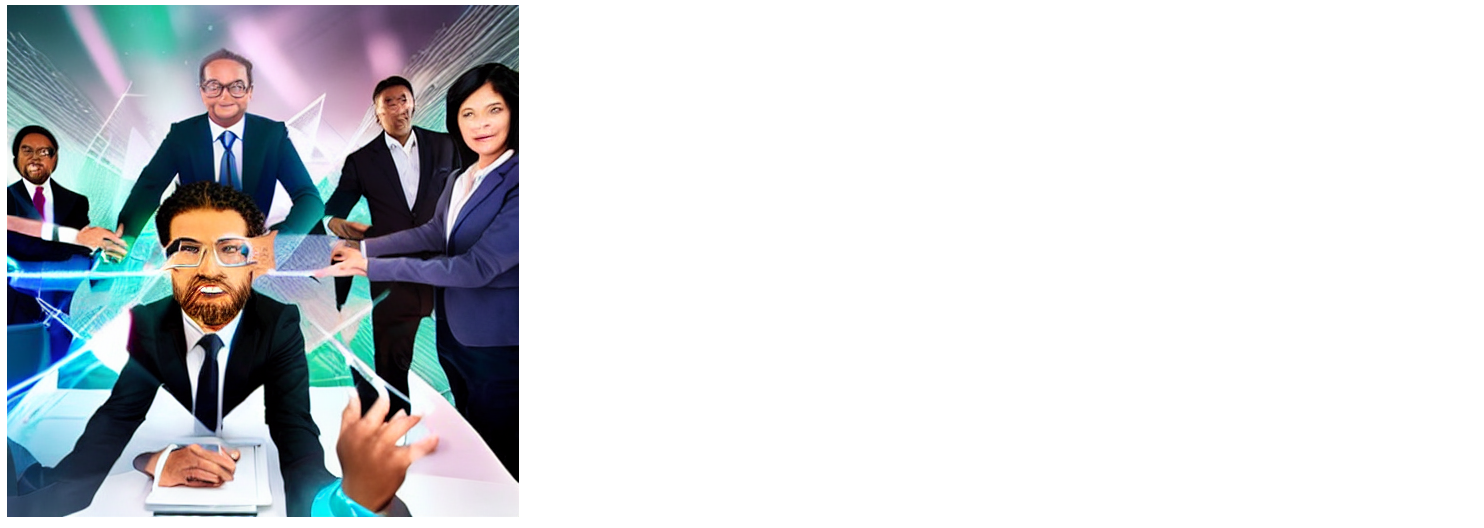

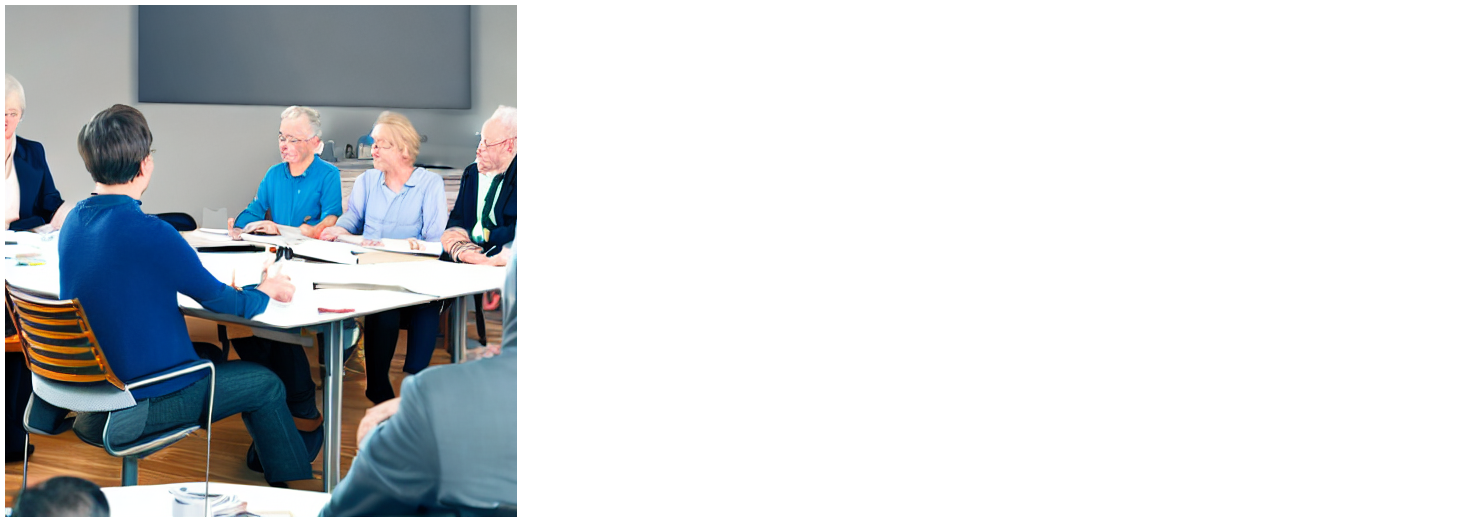

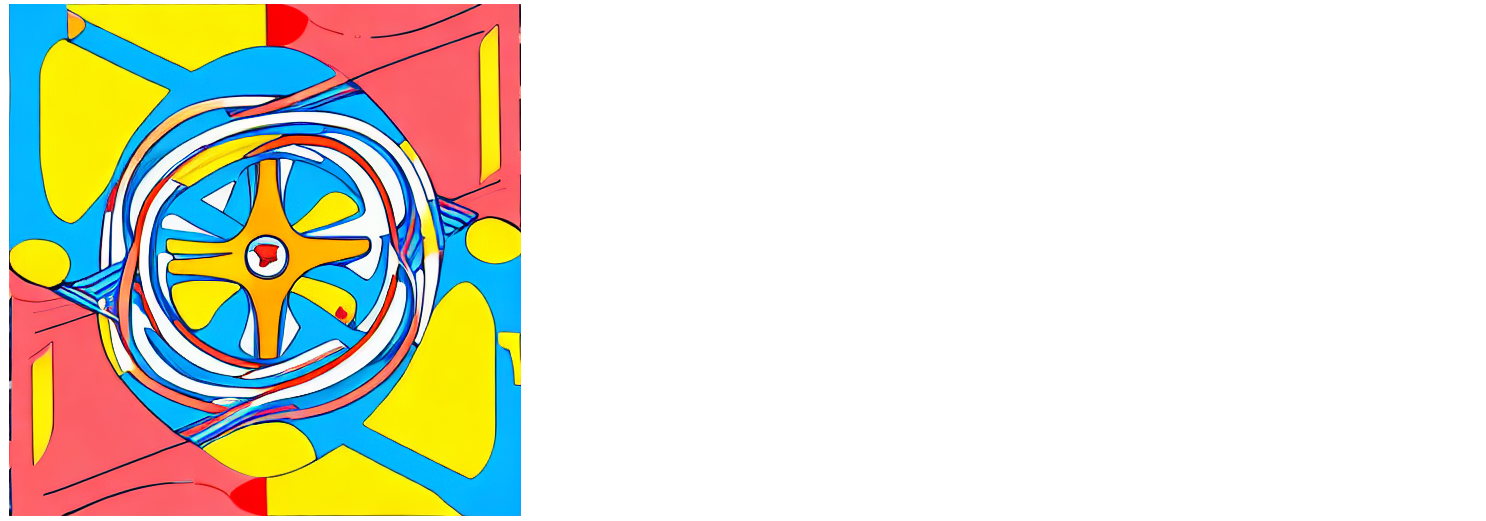

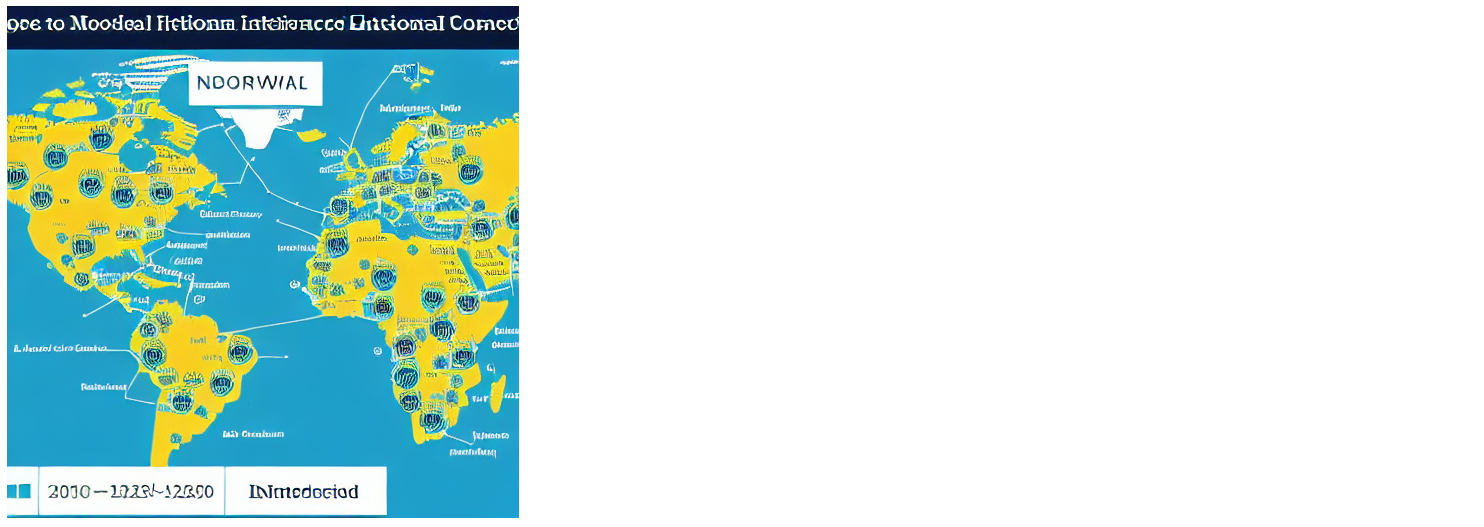

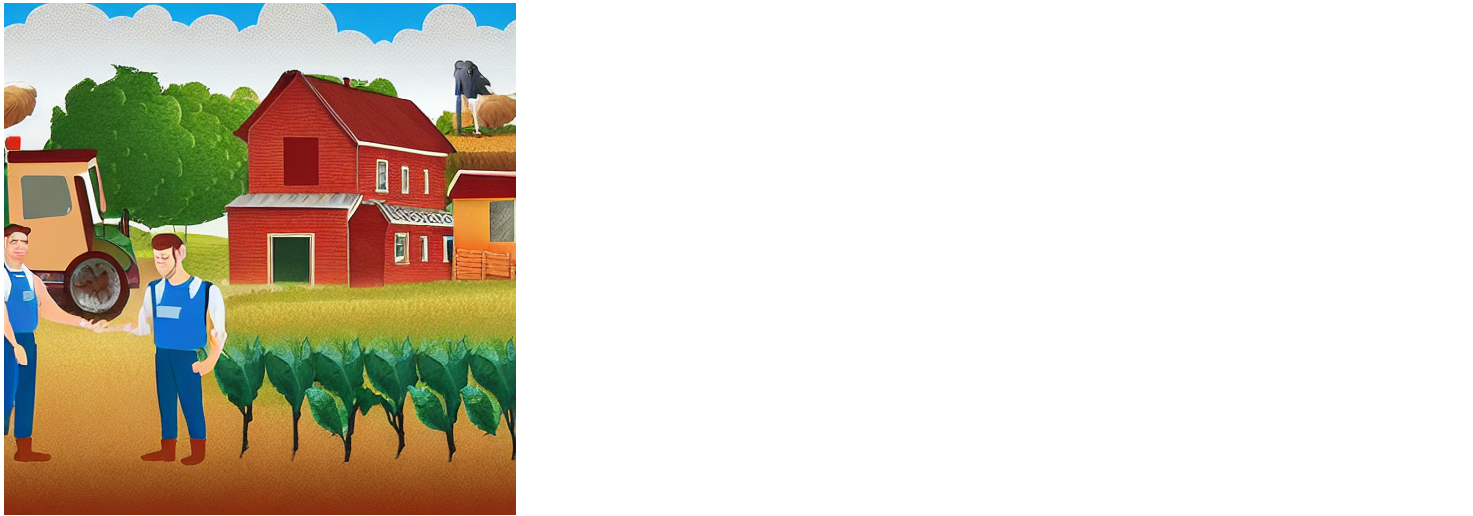

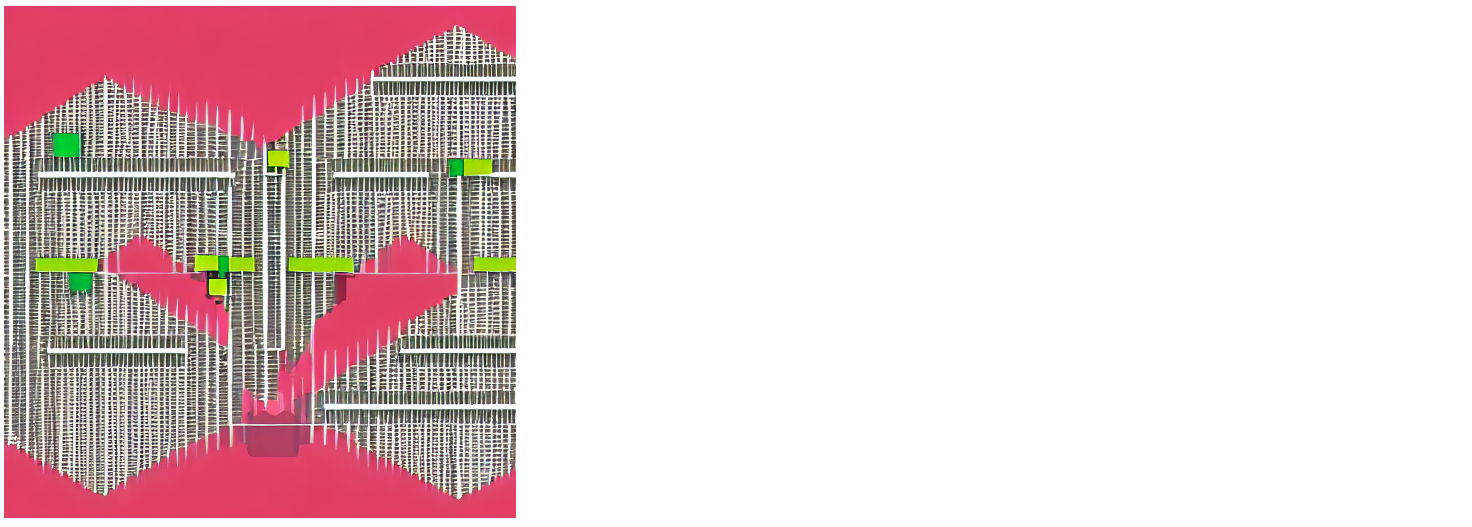